# Datan lukeminen ja visualisoiminen Pythonilla

Käydään läpi esimerkki datan lukemisesta sekä visualisoimisesta Pythonilla.
Käytetään esimerkkidatana csv-tiedostoa, joka pitää sisällään vuoden 2020 kuukausien keskilämpötilat Helsinki-Vantaan lentokentältä mitattuna.
Kaikki tässä notebookissa käytettävä data on peräisin Ilmatieteenlaitoksen avoimesta hakupalvelusta: https://www.ilmatieteenlaitos.fi/havaintojen-lataus. Ladattuja datatiedostoja on muokattu hieman, jotta ne soveltuvat paremmin tässä esimerkissä käytettäväksi.

Voit joko vain ajaa esimerkkisolut läpi ja katsoa, mitä niissä oleva koodi tekee tai voit myös kokeilla itse muokata koodia esimerkkiä läpikäydessäsi. Koodisolujen ajaminen onnistuu joko painamalla "Run"-nappia sivun yläreunasta tai näppäinyhdistelmällä `CTRL+ENTER`.

### Muuttujat

Muuttujat ovat tärkeitä ohjelmoinnin kannalta. Niiden avulla voimme tallentaa muistiin tietoa, joka on myöhemmin helposti saatavilla muuttujan avulla. Esimerkiksi voimme tallentaa jonkin luvun, vaikkapa luku 3, muuttujaan "x" kirjoittamalla

`x = 3`

Tämän jälkeen aina kun kirjoitamme koodissamme muuttujan "x", sillä viitataan lukuun 3.

Kokeillaan (aja koodisolut):

In [1]:
# Tallennetaan luku 3 muuttujaan "x".

x = 3

Lukujen lisäksi muuttujiin voidaan tallentaa muutakin, esimerkiksi tekstiä tai DataFrameja (näistä lisää myöhemmin).

Jos ajoit edellisen koodisolun, seuraava solu tulostaa sinulle nyt muuttujan "x" arvon.

In [2]:
x

3

### Datan lukeminen tiedostosta

Datan lukeminen tiedostosta Pythonilla on helppoa. Meidän tulee kuitenkin ensin hakea `import`-komennolla käyttöömme kirjasto nimeltä [pandas](). Pythonissa kirjastot ovat kokoelmia valmista ja käyttökelpoista koodia, jotta kaikkea ei tarvitse itse tehdä. Pandas-kirjasto sisältää paljon käteviä funktioita, joiden avulla voidaan lukea ja analysoida dataa.

In [3]:
# Tuodaan pandas-kirjasto import-komennolla
import pandas as pd 

# Tästä lähtien pandas-kirjaston funktioihin pääsee käsiksi lyhennettä "pd" käyttämällä.

Luetaan seuraavaksi esimerkkidata pandas-kirjaston [pd.read_csv()]()-funktiolla. Funktiolle annetaan parametriksi (sulkeiden sisälle ja lainausmerkkeihin) luettavan tiedoston tiedostopolku tai osoite, jos tiedosto on netissä. Voimme tallentaa luetun datan, eli DataFramen, muuttujaan. Annetaan muuttujalle nimeksi vaikkapa "data".

In [4]:
# Luetaan datatiedosto nimeltä "keskilampotila2020_Helsinki.csv" ja tallennetaan se muuttujaan "data"

data = pd.read_csv("keskilampotila2020_Helsinki.csv")

### Datan tutkiminen

Voimme tarkastella dataa esimerkiksi [`head()`]()-funktion avulla. Funktio tulostaa näytölle datan viisi ensimmäistä riviä. Tulostettavien rivien määrää voi vaihtaa kirjoittamalla luvun sulkeiden sisään. Vastaavasti [`tail()`]()-funktiolla voisimme katsoa datan viisi viimeistä riviä.

In [5]:
# Katsotaan datan viisi ensimmäistä riviä
data.head()

,Vuosi,Kk,Keskilämpötila (°C)
0,2020,1,1.9
1,2020,2,0.5
2,2020,3,1.7
3,2020,4,4.5
4,2020,5,9.5


Joskus on myös hyvä tarkastella, mitä sarakkeita datassa on. Tämä onnistuu [`columns`]()-komennolla.

In [6]:
# Katsotaan, mitä sarakkeita data sisältää.

data.columns

Index(['Vuosi', 'Kk', 'Keskilämpötila (°C)'], dtype='object')

### Datan valitseminen

Tyypillisesti olemme kiinnostuneita tietystä tai tietyistä sarakkeista datatiedostossa.
Voisimme esimerkiksi haluta piirtää kuvaajan, jossa x-akselilla ovat kuukaudet ja y-akselilla kuukauden keskilämpötila. 
Tätä varten voisimme erottaa sarakkeet omiksi muuttujikseen.
Se onnistuu seuraavasti:

In [7]:
# Valitaan datasta 'Keskilämpötila (°C)'-sarake ja tallennetaan se muuttujaan test2

temp = data['Keskilämpötila (°C)']

In [8]:
# Katsotaan nyt "temp"-muuttujan ensimmäiset rivit

temp.head()

0    1.9
1    0.5
2    1.7
3    4.5
4    9.5
Name: Keskilämpötila (°C), dtype: float64

Vastaavasti tallennetaan kuukaudet muuttujaan "month"

In [9]:
month = data['Kk']

month.head()

0    1
1    2
2    3
3    4
4    5
Name: Kk, dtype: int64

### Datan visualisoiminen

Datan visualisoimiseksi tarvitsemme [matplotlib]()-kirjastoa. Tämä kirjasto sisältää paljon käteviä funktioita esimerkiksi juuri kuvaajien piirtämistä varten. Jos haluamme vain nopeasti piirtää datan, voimme käyttää pelkästään [`plt.plot(xdata, ydata)`]()-funktiota.

In [10]:
# Tuodaan matplotlib.pyplot -kirjasto import-komennolla ja valitaan sen lyhenteeksi plt

import matplotlib.pyplot as plt

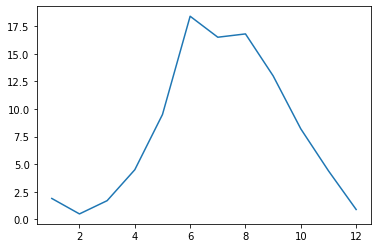

In [11]:
# Piirretään lämpötilat kuukauden funktiona plt.plot-funktiolla

plt.plot(month, temp)

Yllä olevalla tavalla piirretty kuvaaja on kuitenkin vielä hieman epäselvä. Mitä akselit kuvaavat? Kuvaajaan kannattaa lisätä akselien kuvaukset sekä esimerkiksi otsikko. Tätä varten tarvitsemme muitakin funktioita matplotlib-kirjastosta:

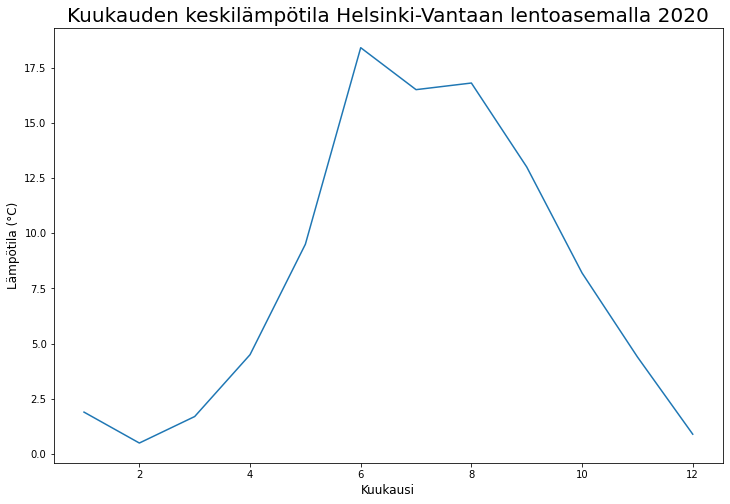

In [12]:
# Alustetaan kuva plt.figure()-komennolla, voimme muutta myös kuvaajan kokoa
plt.figure(figsize=(12,8))

# Asetetaan akseleiden nimet
plt.xlabel('Kuukausi', fontsize=12)
plt.ylabel('Lämpötila (°C)', fontsize=12)

# Asetetaan kuvaajan otsikko
plt.title('Kuukauden keskilämpötila Helsinki-Vantaan lentoasemalla 2020', fontsize=20)

# Piirretään haluamamme data
plt.plot(month, temp)

# Näytetään kuva
plt.show()

### Laajempi esimerkki

Piirretään vielä esimerkin vuoksi samaan kuvaajaan kolmen eri paikkakunnan (Helsingin, Tampereen ja Oulun) keskilämpötilat.
Keskilämpötilat löytyvät seuraavista tiedostoista:
- keskilampotila2020_Helsinki.csv
- keskilampotila2020_Tampere.csv
- keskilampotila2020_Oulu.csv

In [13]:
# Luetaan tiedostot pandas:n avulla.
# Huom. import-komentoa ei enää tarvita, jos se on tehty jo edellä

data_Helsinki = pd.read_csv('keskilampotila2020_Helsinki.csv')
data_Tampere = pd.read_csv('keskilampotila2020_Tampere.csv')
data_Oulu = pd.read_csv('keskilampotila2020_Oulu.csv')

In [14]:
# Kurkataan, miltä tiedostot näyttävät
data_Helsinki.head()

,Vuosi,Kk,Keskilämpötila (°C)
0,2020,1,1.9
1,2020,2,0.5
2,2020,3,1.7
3,2020,4,4.5
4,2020,5,9.5


In [15]:
data_Tampere.head()

,Vuosi,Kk,Keskilämpötila (°C)
0,2020,1,0.9
1,2020,2,-0.9
2,2020,3,0.7
3,2020,4,3.4
4,2020,5,8.5


In [16]:
data_Oulu.head()

,Vuosi,Kk,Keskilämpötila (°C)
0,2020,1,-1.9
1,2020,2,-3.6
2,2020,3,-1.6
3,2020,4,0.6
4,2020,5,7.1


In [17]:
# Tallennetaan lämpötilatiedot omiin muuttujiinsa

temp_Helsinki = data_Helsinki['Keskilämpötila (°C)']
temp_Tampere = data_Tampere['Keskilämpötila (°C)']
temp_Oulu = data_Oulu['Keskilämpötila (°C)']

# Kuukaudet ovat kaikissa samat, joten otetaan se vain yhdestä datasetistä

month = data_Helsinki['Kk']

Piirretään vielä kuvaaja. Huom. kaikki tässä esitellyt parametrit eivät suinkaan ole pakollisia, mutta ne on esitelty tässä, jotta niistä voi ottaa mallia ja halutessaan käyttää.

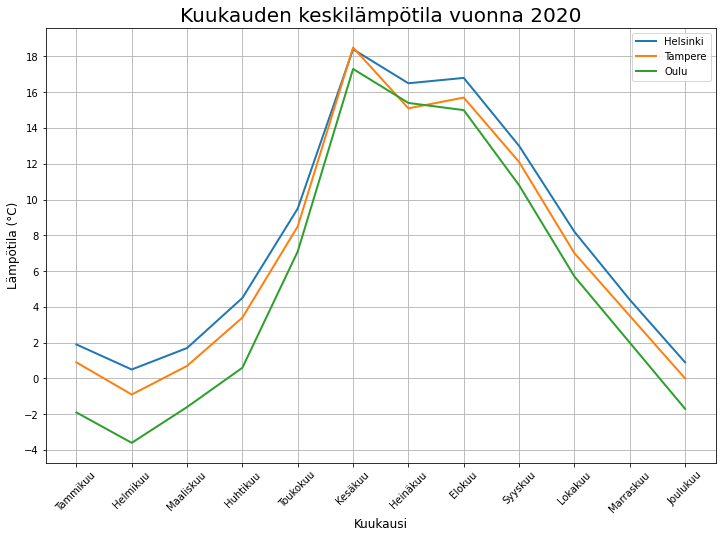

In [35]:
# Piirretään kaikki samaan kuvaan

plt.figure(figsize=(12,8))

# Akselien selitteet sekä kuvaajan otsikko
plt.xlabel('Kuukausi', fontsize=12)
plt.ylabel('Lämpötila (°C)', fontsize=12)
plt.title('Kuukauden keskilämpötila vuonna 2020', fontsize=20)

# Datan piirtäminen, label on käyrän selite, linewidth säätää viivan paksuutta, vakioarvona on 1.
plt.plot(month, temp_Helsinki, label='Helsinki', linewidth=2)
plt.plot(month, temp_Tampere, label='Tampere', linewidth=2)
plt.plot(month, temp_Oulu, label='Oulu', linewidth=2)

# Näytetään käyrien selitteet
plt.legend()

# Määritellään kuukausien nimet, jotka asetetaan x-akselille numeroiden sijasta.
month_labels = ['Tammikuu','Helmikuu','Maaliskuu','Huhtikuu','Toukokuu','Kesäkuu','Heinäkuu','Elokuu','Syyskuu','Lokakuu','Marraskuu','Joulukuu']

# Määritetään akseleiden asteikot. Ensimmäinen parametri on pisteiden sijainti akselilla ja toinen on pisteen selite.
# Selitettä ei välttämättä tarvitse antaa, jolloin pisteen arvo tulee akselille.
plt.xticks(month, month_labels, rotation=45)
plt.yticks(range(-4,20,2))

# Näytetään ruudukko
plt.grid()

# Näytetään kuva
plt.show()